<a href="https://colab.research.google.com/github/snfruby/CS114.K21/blob/master/Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

image shape: [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 30. 31. ... 14. 14.  0.]
 [ 0. 30. 31. ... 14. 14.  0.]
 ...
 [ 0. 14. 14. ... 14. 14.  0.]
 [ 0. 14. 14. ... 16. 16.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
result [[ 60. 122. 124. ...  56.  56.  56.]
 [ 90. 183. 186. ...  84.  84.  84.]
 [ 90. 182. 184. ...  84.  84.  84.]
 ...
 [ 42.  84.  85. ...  82.  82.  82.]
 [ 42.  84.  84. ...  90.  89.  88.]
 [ 28.  56.  56. ...  62.  61.  60.]]
image [[30 31 31 ... 14 14 14]
 [30 31 31 ... 14 14 14]
 [30 31 31 ... 14 14 14]
 ...
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 17 16 16]]


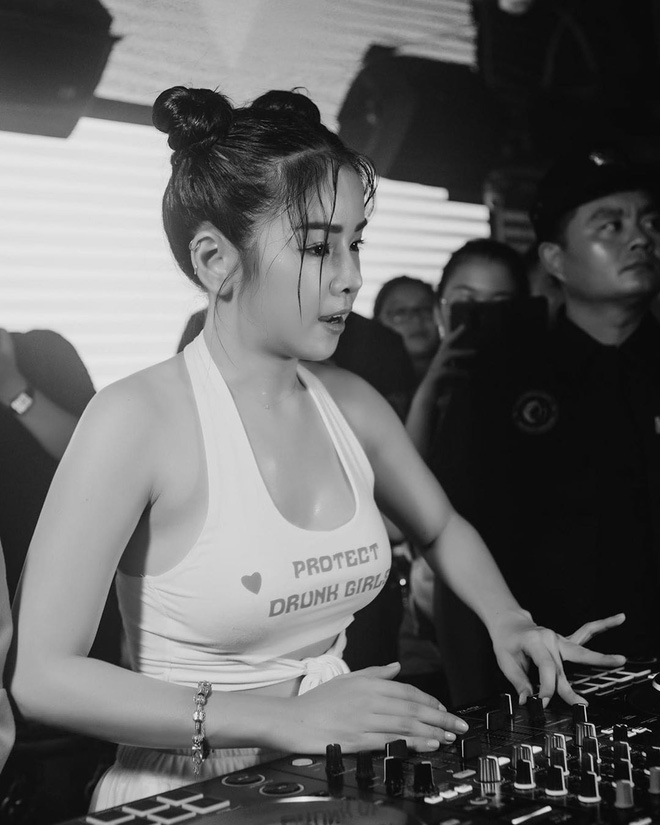

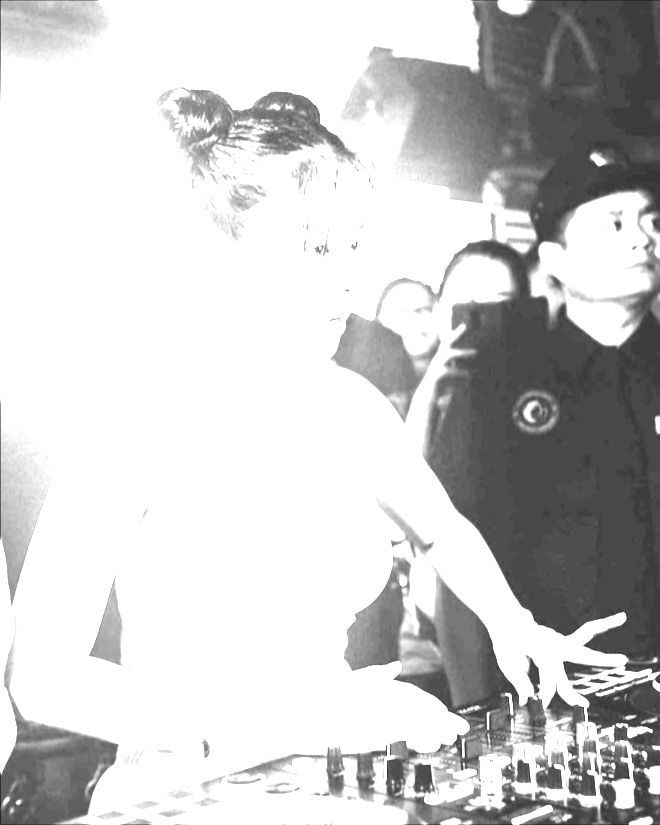

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

path = '/content/djmie95102299149177438427064561303315618319634325n-1597149855260902137174-15977466124961815418896.jpg' # tìm 1 bức ảnh ngẫu nhiên trên mạng (dj Mie - Rap Việt)
img = cv2.imread(path, 0) # đọc ảnh
new_img = np.zeros((img.shape[0]+2, img.shape[1]+2)) # tạo ra 1 array có số cột / hàng = số cột / hàng của input + 2 , để dễ dàng quét từng 3x3 pixcel
new_img[1:-1,1:-1]=img # truyền giá trị của input vào array zeros vừa tạo => như vậy ta dc 1 array có giá trị như hình input dc bao quanh bởi các số 0 

print("image shape:", new_img) # in ra để hình dung được 3 bước ở trên

# hàm nhân tích chập
kernel = np.array([[1,1,0],[1,1,0],[1,1,0]])   # tạo 1 cái kernel ngẫu nhiên
def convolution(img,kernel): 
  sum=0
  for i in range(3):
    for j in range(3):
      sum+=(img[i][j]*kernel[i][j]) # tính giá trị từng ô
  return sum 

result= np.zeros((img.shape[0],img.shape[1]))  # tạo 1 array như input để chứa kết quả cuối cùng

for i in range(0,img.shape[0]): 
  for j in range(0,img.shape[1]):
    
    matrix_split= new_img[i:i+3,j:j+3] # tách ra thành từng ô 3x3 pixcel để đưa vào hàm Convolution nhân tích chập
    
    kq=int(convolution(matrix_split, kernel))
    
    result[i][j]=kq
print("result",result)   
print("image", img) 
# In Kết quả
cv2_imshow(img)
cv2_imshow(result)

image shape: [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 30. 31. ... 14. 14.  0.]
 [ 0. 30. 31. ... 14. 14.  0.]
 ...
 [ 0. 14. 14. ... 14. 14.  0.]
 [ 0. 14. 14. ... 16. 16.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
result [[122. 124. 124. ...  56.  56.  28.]
 [183. 186. 185. ...  84.  84.  42.]
 [182. 184. 183. ...  84.  84.  42.]
 ...
 [ 84.  85.  86. ...  82.  82.  41.]
 [ 84.  84.  84. ...  89.  88.  44.]
 [ 56.  56.  56. ...  61.  60.  30.]]
image [[30 31 31 ... 14 14 14]
 [30 31 31 ... 14 14 14]
 [30 31 31 ... 14 14 14]
 ...
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 17 16 16]]


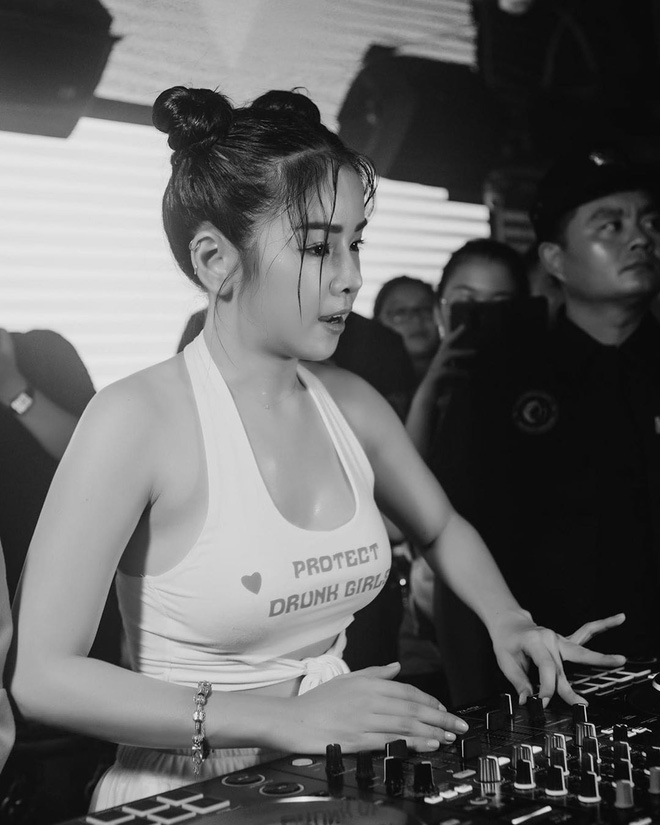

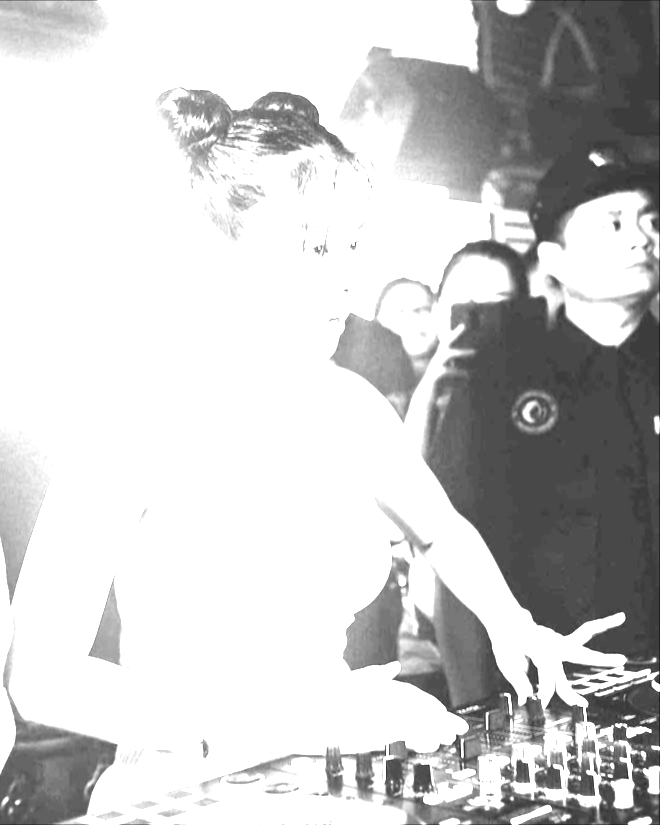

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

path = '/content/djmie95102299149177438427064561303315618319634325n-1597149855260902137174-15977466124961815418896.jpg' # tìm 1 bức ảnh ngẫu nhiên trên mạng (dj Mie - Rap Việt)
img = cv2.imread(path, 0) # đọc ảnh
new_img = np.zeros((img.shape[0]+2, img.shape[1]+2)) # tạo ra 1 array có số cột / hàng = số cột / hàng của input + 2 , để dễ dàng quét từng 3x3 pixcel
new_img[1:-1,1:-1]=img # truyền giá trị của input vào array zeros vừa tạo => như vậy ta dc 1 array có giá trị như hình input dc bao quanh bởi các số 0 

print("image shape:", new_img) # in ra để hình dung được 3 bước ở trên

# hàm nhân tích chập
kernel = np.array([[1,1,0],[1,1,0],[1,1,0]])   # tạo 1 cái kernel ngẫu nhiên
def cross_correlation(img,kernel): 
  sum=0
  for i in range(3):
    for j in range(3):
      sum+=(img[i][j]*kernel[2-i][2-j]) # tính giá trị từng ô theo kiểu chéo
  return sum 

result= np.zeros((img.shape[0],img.shape[1]))  # tạo 1 array như input để chứa kết quả cuối cùng

for i in range(0,img.shape[0]): 
  for j in range(0,img.shape[1]):
    
    matrix_split= new_img[i:i+3,j:j+3] # tách ra thành từng ô 3x3 pixcel để đưa vào hàm Cross_Correlation nhân tích chập
    
    kq=int(cross_correlation(matrix_split, kernel))
    
    result[i][j]=kq
print("result",result)   
print("image", img) 
# In Kết quả
cv2_imshow(img)
cv2_imshow(result)